# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 10K
- Data = [Bracket, non-Bracket, Palindrome, Matching-Pair, unMatching]

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from trainer.supervised_trainer_unmatching import SupervisedTrainer_unmatching
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
data_name = ["Bracket", "non-Bracket", "Palindrome", "Matching-Pair"]
data_path = ["data/bracket/N100", "data/nonbracket/N100", "data/palindrome/N100", "data/matching_pairs/N100"]
character_accuracy = []
sentance_accuracy = []

# Prepare dataset

data : Bracket


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-28 00:05:59,829 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-28 00:07:03,242 INFO   Finished epoch 1: Train loss: 16.9562,

2019-02-28 01:16:54,219 INFO   Finished epoch 53: Train loss: 1.7512, Dev loss: 2.1871, Accuracy(Character): 0.6747, Accuracy(Word): 0.2611
2019-02-28 01:18:12,966 INFO   Finished epoch 54: Train loss: 1.7751, Dev loss: 2.1281, Accuracy(Character): 0.6986, Accuracy(Word): 0.2651
2019-02-28 01:19:34,037 INFO   Finished epoch 55: Train loss: 1.6937, Dev loss: 2.1780, Accuracy(Character): 0.6928, Accuracy(Word): 0.2829
2019-02-28 01:20:53,183 INFO   Finished epoch 56: Train loss: 1.6609, Dev loss: 1.8926, Accuracy(Character): 0.7370, Accuracy(Word): 0.1234
2019-02-28 01:22:17,245 INFO   Finished epoch 57: Train loss: 1.7325, Dev loss: 1.8914, Accuracy(Character): 0.7354, Accuracy(Word): 0.2836
2019-02-28 01:23:41,402 INFO   Finished epoch 58: Train loss: 1.7018, Dev loss: 1.8354, Accuracy(Character): 0.7518, Accuracy(Word): 0.1404
2019-02-28 01:25:01,241 INFO   Finished epoch 59: Train loss: 1.6948, Dev loss: 2.0332, Accuracy(Character): 0.6996, Accuracy(Word): 0.1376
2019-02-28 01:26:20,

data : non-Bracket


2019-02-28 02:20:20,104 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 02:21:51,689 INFO   Finished epoch 1: Train loss: 14.9822, Dev loss: 12.2549, Accuracy(Character): 0.1346, Accuracy(Word): 0.0000
2019-02-28 02:23:20,765 INFO   Finished epoch 2: Train loss: 12.2260, Dev loss: 11.7351, Accuracy(Character): 0.1494, Accuracy(Word): 0.0000
2019-02-28 02:24:48,340 INFO   Finished epoch 3: Train loss: 11.2586, Dev loss: 10.4869, Accuracy(Character): 0.1741, Accuracy(Word): 0.0000
2019-02-28 02:26:18,893 INFO   Finished epoch 4: Train loss: 9.4369, Dev loss: 9.8775, Accuracy(Character): 0.1978, Accuracy(Word): 0.0000
2019-02-28 02:27:48,024 INFO   Finished epoch 5: Train loss: 8.5046, Dev loss: 10.6647, Accuracy(Character): 0.1787, Accuracy(Word): 0.0192
2019-02-28 02:29:16,836 INFO   Finished epoch 6: Train loss: 10.9155, Dev loss: 9.4308, Accuracy(Character): 0.2007, Acc

2019-02-28 03:45:33,726 INFO   Finished epoch 59: Train loss: 2.0059, Dev loss: 2.5721, Accuracy(Character): 0.6275, Accuracy(Word): 0.0774
2019-02-28 03:46:51,945 INFO   Finished epoch 60: Train loss: 1.8705, Dev loss: 2.7629, Accuracy(Character): 0.5854, Accuracy(Word): 0.0615
2019-02-28 03:48:14,308 INFO   Finished epoch 61: Train loss: 2.2085, Dev loss: 2.7621, Accuracy(Character): 0.6033, Accuracy(Word): 0.0726
2019-02-28 03:49:36,273 INFO   Finished epoch 62: Train loss: 1.9626, Dev loss: 2.6559, Accuracy(Character): 0.6379, Accuracy(Word): 0.0797
2019-02-28 03:50:52,615 INFO   Finished epoch 63: Train loss: 1.8886, Dev loss: 2.3469, Accuracy(Character): 0.6722, Accuracy(Word): 0.1012
2019-02-28 03:52:11,431 INFO   Finished epoch 64: Train loss: 1.8267, Dev loss: 2.4658, Accuracy(Character): 0.6564, Accuracy(Word): 0.0994
2019-02-28 03:53:29,927 INFO   Finished epoch 65: Train loss: 1.9132, Dev loss: 2.5930, Accuracy(Character): 0.6522, Accuracy(Word): 0.1054
2019-02-28 03:54:48,

data : Palindrome


2019-02-28 04:27:14,002 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 04:28:02,933 INFO   Finished epoch 1: Train loss: 26.9101, Dev loss: 24.4613, Accuracy(Character): 0.1308, Accuracy(Word): 0.0000
2019-02-28 04:28:46,635 INFO   Finished epoch 2: Train loss: 20.4633, Dev loss: 21.7387, Accuracy(Character): 0.1615, Accuracy(Word): 0.0000
2019-02-28 04:29:28,989 INFO   Finished epoch 3: Train loss: 17.6894, Dev loss: 20.8392, Accuracy(Character): 0.1524, Accuracy(Word): 0.0000
2019-02-28 04:30:16,091 INFO   Finished epoch 4: Train loss: 18.2909, Dev loss: 21.7393, Accuracy(Character): 0.1619, Accuracy(Word): 0.0000
2019-02-28 04:31:04,030 INFO   Finished epoch 5: Train loss: 16.4504, Dev loss: 23.6956, Accuracy(Character): 0.1713, Accuracy(Word): 0.0000
2019-02-28 04:31:48,831 INFO   Finished epoch 6: Train loss: 14.8983, Dev loss: 27.4055, Accuracy(Character): 0.1841,

2019-02-28 05:12:16,516 INFO   Finished epoch 58: Train loss: 4.7783, Dev loss: 41.1899, Accuracy(Character): 0.3281, Accuracy(Word): 0.0618
2019-02-28 05:13:03,903 INFO   Finished epoch 59: Train loss: 6.2144, Dev loss: 9.4752, Accuracy(Character): 0.3711, Accuracy(Word): 0.0413
2019-02-28 05:13:49,977 INFO   Finished epoch 60: Train loss: 4.3159, Dev loss: 12.3630, Accuracy(Character): 0.3550, Accuracy(Word): 0.0466
2019-02-28 05:14:35,444 INFO   Finished epoch 61: Train loss: 7.4002, Dev loss: 9.0763, Accuracy(Character): 0.3857, Accuracy(Word): 0.0269
2019-02-28 05:15:18,705 INFO   Finished epoch 62: Train loss: 3.8869, Dev loss: 12.1292, Accuracy(Character): 0.3887, Accuracy(Word): 0.0505
2019-02-28 05:16:03,730 INFO   Finished epoch 63: Train loss: 4.6809, Dev loss: 8.0524, Accuracy(Character): 0.3888, Accuracy(Word): 0.0337
2019-02-28 05:16:48,869 INFO   Finished epoch 64: Train loss: 5.4293, Dev loss: 8.1753, Accuracy(Character): 0.3934, Accuracy(Word): 0.0575
2019-02-28 05:17:

data : Matching-Pair


2019-02-28 05:44:56,539 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 05:45:51,190 INFO   Finished epoch 1: Train loss: 14.1846, Dev loss: 9.8695, Accuracy(Character): 0.2301, Accuracy(Word): 0.0000
2019-02-28 05:46:45,967 INFO   Finished epoch 2: Train loss: 9.4432, Dev loss: 10.0970, Accuracy(Character): 0.2790, Accuracy(Word): 0.0000
2019-02-28 05:47:40,974 INFO   Finished epoch 3: Train loss: 9.3392, Dev loss: 14.1247, Accuracy(Character): 0.1555, Accuracy(Word): 0.0000
2019-02-28 05:48:33,822 INFO   Finished epoch 4: Train loss: 8.0420, Dev loss: 9.9748, Accuracy(Character): 0.3796, Accuracy(Word): 0.0000
2019-02-28 05:49:30,429 INFO   Finished epoch 5: Train loss: 9.5309, Dev loss: 11.0348, Accuracy(Character): 0.1887, Accuracy(Word): 0.0000
2019-02-28 05:50:28,683 INFO   Finished epoch 6: Train loss: 9.6957, Dev loss: 21.6330, Accuracy(Character): 0.1635, Accura

2019-02-28 06:39:43,352 INFO   Finished epoch 59: Train loss: 1.1205, Dev loss: 1.2312, Accuracy(Character): 0.9368, Accuracy(Word): 0.6007
2019-02-28 06:40:36,221 INFO   Finished epoch 60: Train loss: 1.0894, Dev loss: 1.2404, Accuracy(Character): 0.9431, Accuracy(Word): 0.7000
2019-02-28 06:41:30,179 INFO   Finished epoch 61: Train loss: 1.1137, Dev loss: 1.2076, Accuracy(Character): 0.9398, Accuracy(Word): 0.6210
2019-02-28 06:42:25,293 INFO   Finished epoch 62: Train loss: 1.0996, Dev loss: 1.1662, Accuracy(Character): 0.9549, Accuracy(Word): 0.6938
2019-02-28 06:43:22,987 INFO   Finished epoch 63: Train loss: 1.1126, Dev loss: 1.1218, Accuracy(Character): 0.9653, Accuracy(Word): 0.7945
2019-02-28 06:44:26,998 INFO   Finished epoch 64: Train loss: 1.1382, Dev loss: 1.2276, Accuracy(Character): 0.9421, Accuracy(Word): 0.7075
2019-02-28 06:45:25,212 INFO   Finished epoch 65: Train loss: 1.0988, Dev loss: 1.2015, Accuracy(Character): 0.9529, Accuracy(Word): 0.7847
2019-02-28 06:46:18,

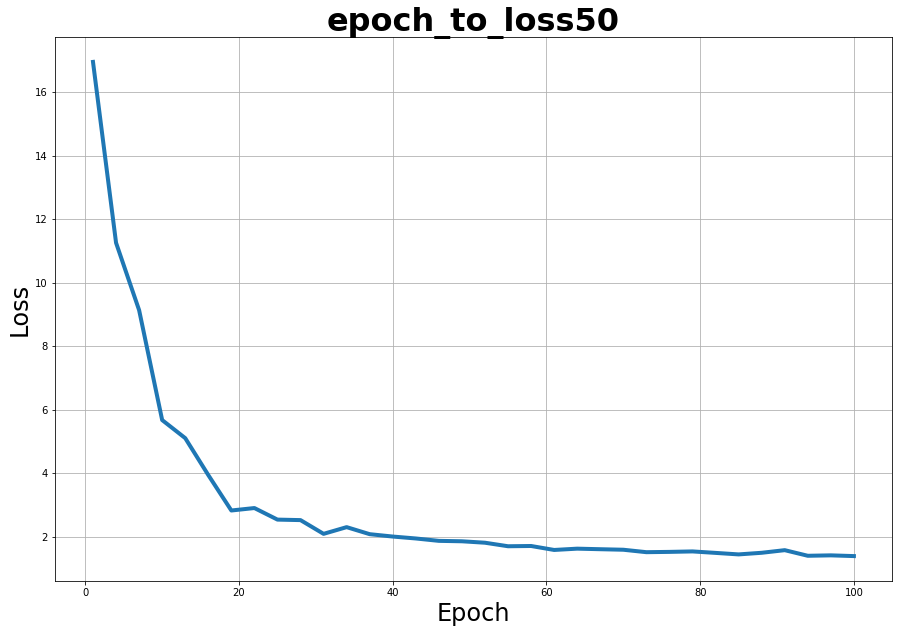

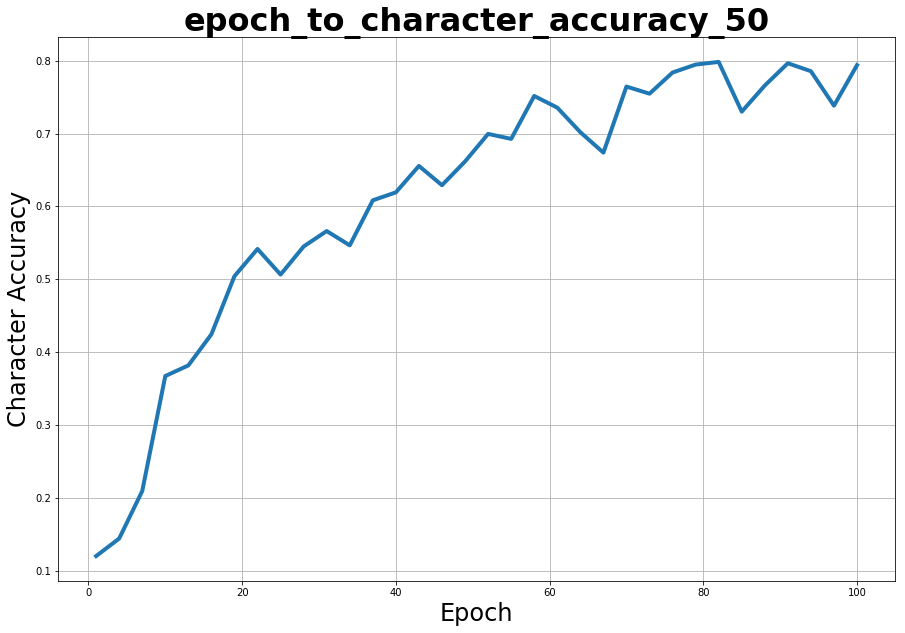

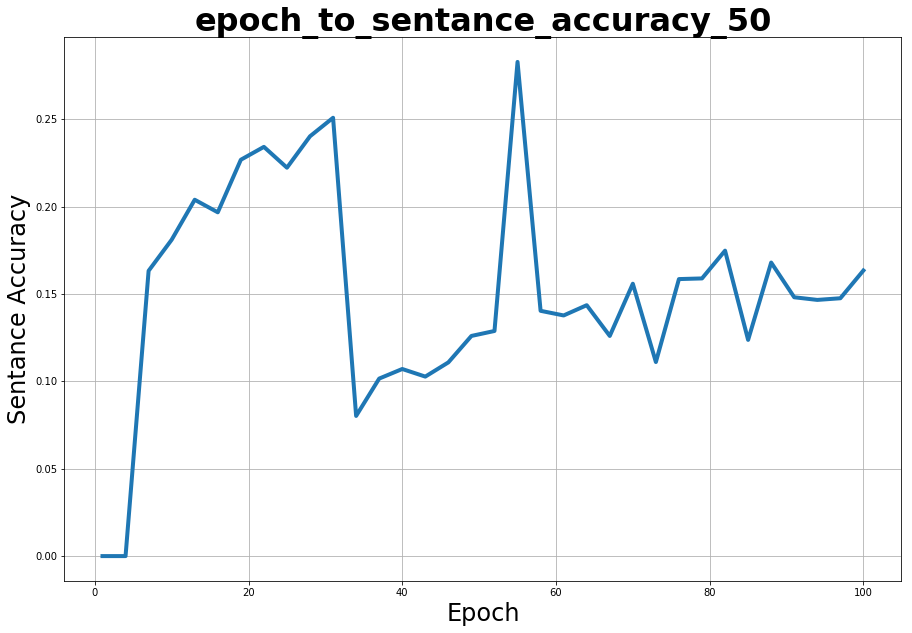

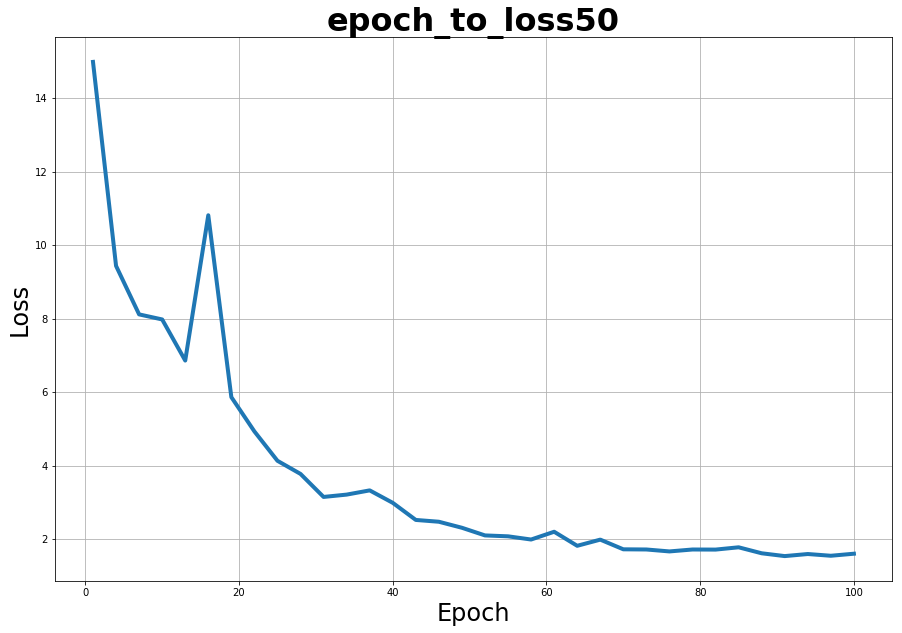

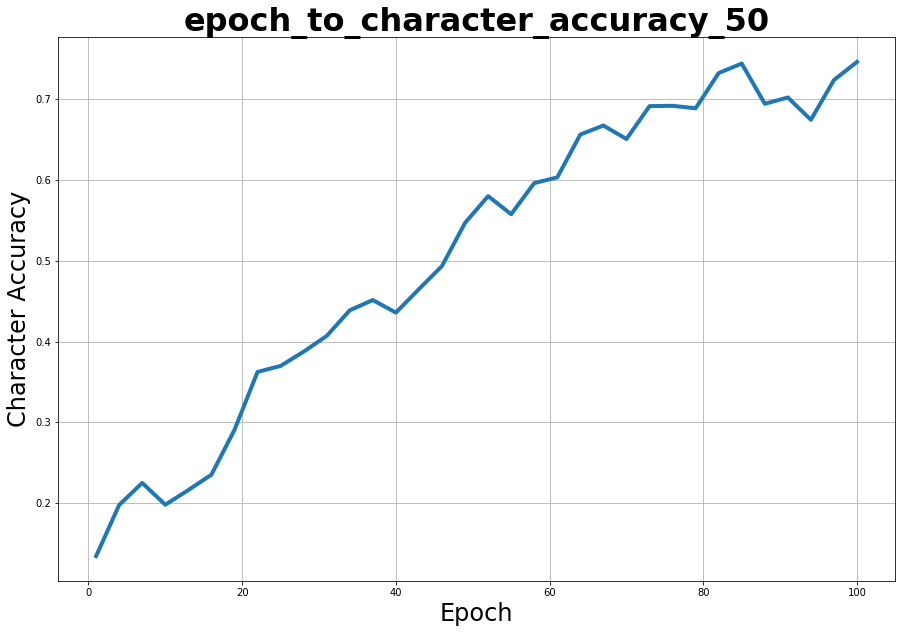

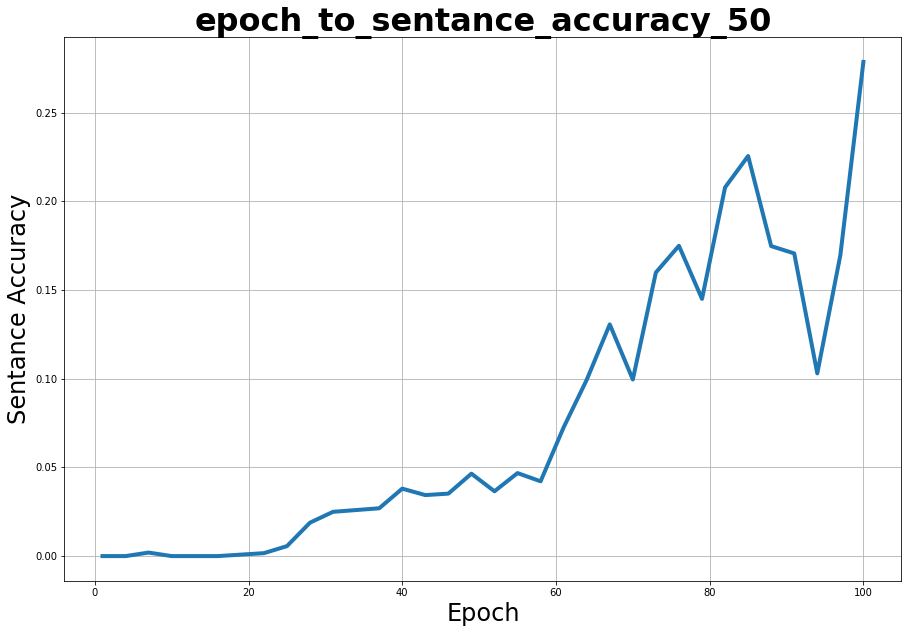

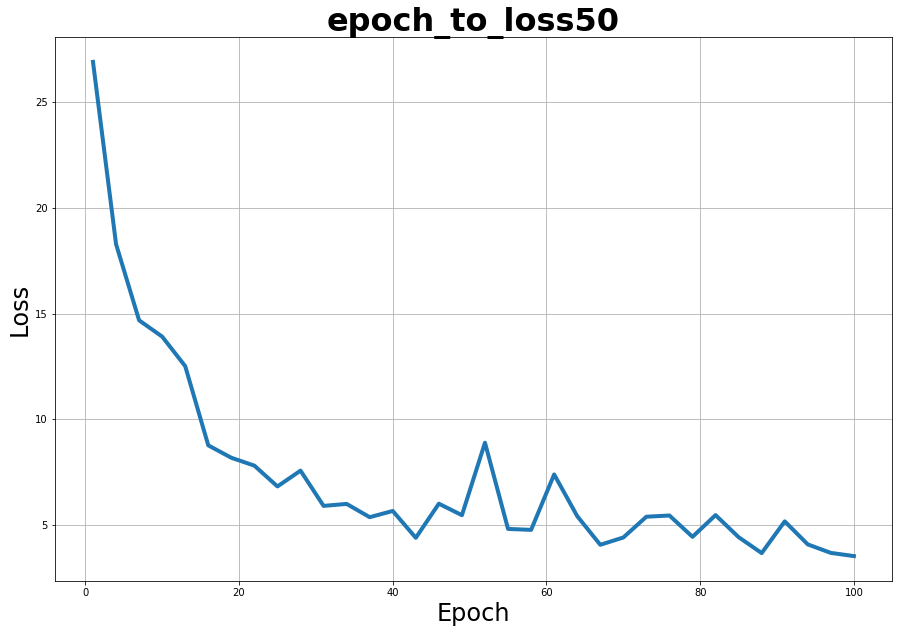

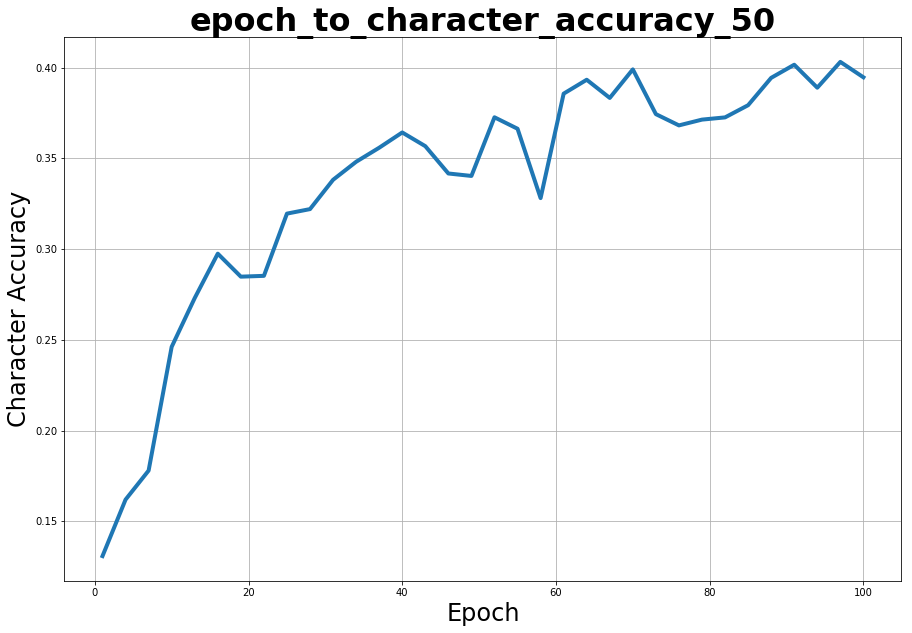

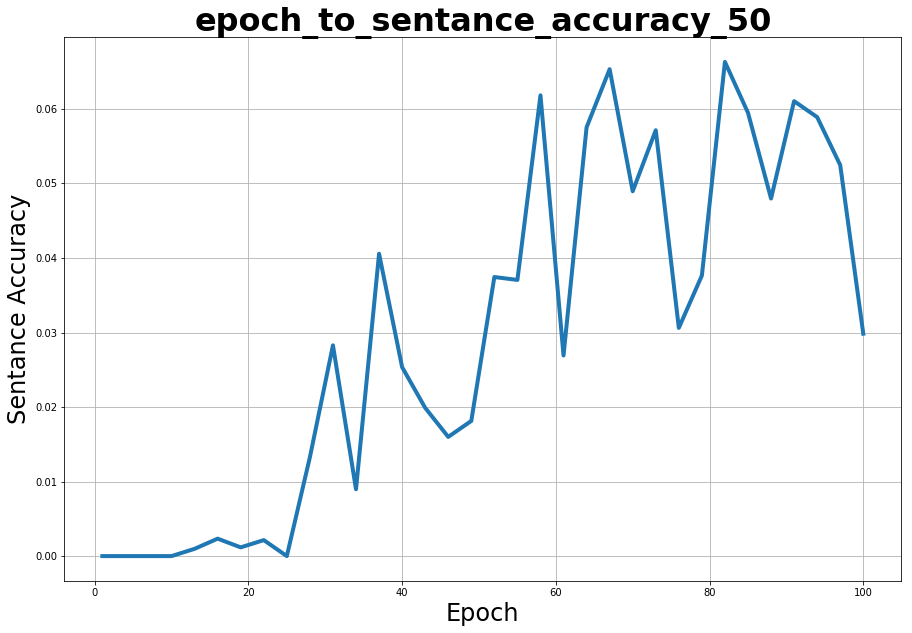

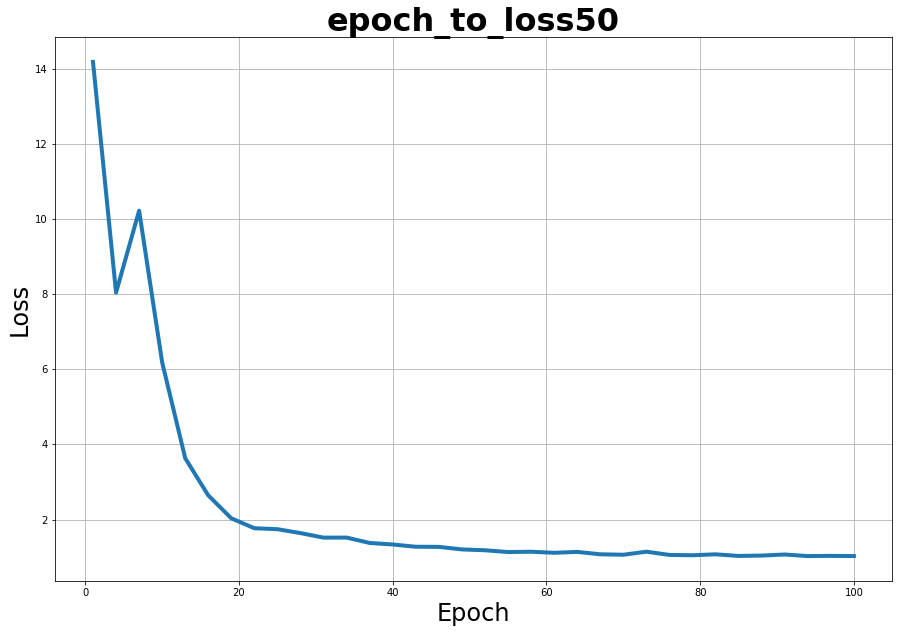

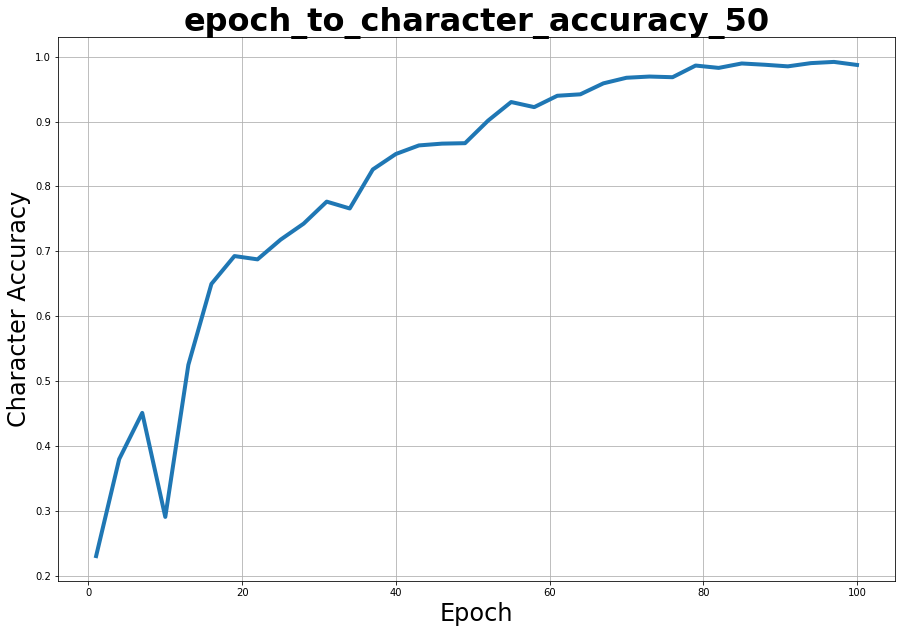

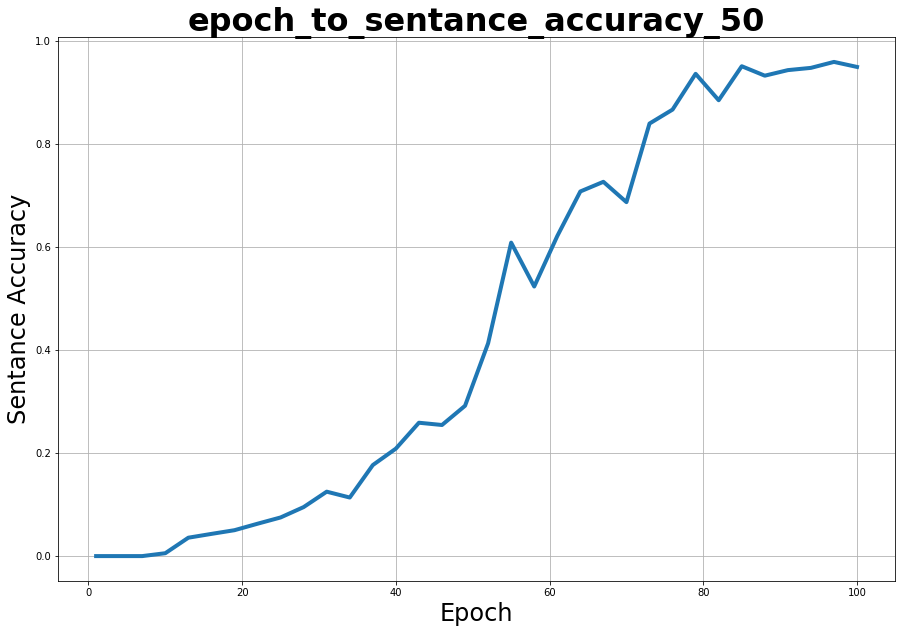

In [4]:
for i, j in zip(data_name, data_path):
    print("data : %s" % i)
    train_path = j + "/data_train.txt"
    dev_path = j + "/data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 104
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="data_to_accuracy/" + i)

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    character_accuracy.append(character_accuracy_list)
    sentance_accuracy.append(sentance_accuracy_list)
    torch.save(seq2seq.state_dict(), 'log/pth/data_to_accuracy_' + i + '_model_save.pth')

- unMatching Data

In [4]:
c_0 = [0.11980779040743293, 0.12724929225904683, 0.14221796474340254, 0.14395081054349054, 0.16514604580164563, 0.1725914416887653, 0.2091681171948926, 0.23956106431778446, 0.23689364999630066, 0.3671218794172965, 0.3538587944844881, 0.4013816037974634, 0.3817089364220823, 0.39138950868954026, 0.41628018364271446, 0.4245082806665031, 0.45093709964447454, 0.46181703484772374, 0.5042970681806677, 0.5026265269486727, 0.48926219709271307, 0.5416369746459349, 0.546979591359914, 0.49424266850465143, 0.506508880347971, 0.5369797081809792, 0.5707565721584249, 0.5450520437845352, 0.5453752487315179, 0.6055147330833363, 0.5662706432557252, 0.592796813121342, 0.5970101595386347, 0.5466602804484372, 0.5974034571247221, 0.5911457420668762, 0.6084625179612387, 0.634241033009739, 0.591211940670475, 0.6194281219456159, 0.6291242703550971, 0.6536644821127479, 0.655712744788807, 0.5464811548151696, 0.6565188101385109, 0.6292216212427425, 0.6311997912796969, 0.6708800130839593, 0.6618497447459726, 0.6325510216002149, 0.6684968633544001, 0.6997036638980074, 0.6747000619151645, 0.6986094399208732, 0.6928306912302427, 0.736950113511135, 0.7353963933443145, 0.7517980708948104, 0.6996218891523853, 0.7300226243462888, 0.7357819028593903, 0.7540527174526778, 0.7248708153720945, 0.702059555379026, 0.700494153105688, 0.7279120571021367, 0.673971877275577, 0.7161014474129975, 0.766303353153974, 0.7647340568451303, 0.7572886609580106, 0.7839822743503775, 0.7549483456190154, 0.774356218580001, 0.786552337784216, 0.7840212147054357, 0.7108951219417219, 0.7895896854787522, 0.7949089379796965, 0.7914743986635671, 0.7412647048515788, 0.7985926955681982, 0.7694185815586266, 0.7064520274295861, 0.7302484784056261, 0.7712254140333251, 0.7847260351319884, 0.7661709559467763, 0.8117039131162798, 0.8076346460127023, 0.796758604844959, 0.7844884989661336, 0.8085653204985923, 0.7858007889315934, 0.8086081548891563, 0.8218868159639879, 0.7384609992873915, 0.8241726148059018, 0.7967001943123717, 0.794180753340109]
c_1 = [0.1345532999044592, 0.14935900237915337, 0.17405286591191513, 0.19780693264061047, 0.17872687194409925, 0.20066691228355013, 0.22511411818335092, 0.21089539843013344, 0.23514278042475067, 0.19809730175283033, 0.1954028012813708, 0.2480845005339045, 0.21630625511268195, 0.2393827939128643, 0.27239120525037314, 0.23530201509919382, 0.28249167920769824, 0.2762378154251566, 0.29069694831429804, 0.3271991557440006, 0.3622151728789005, 0.3624805640029724, 0.36900294115810445, 0.38266590067503015, 0.3699177599740229, 0.37192224352289543, 0.40549265959373304, 0.38756783084906427, 0.3686688605666257, 0.4273796217083695, 0.4070506616044611, 0.4200236041987998, 0.4174165266858581, 0.43875709530975826, 0.4131140682273746, 0.4051835569904022, 0.45145215778595116, 0.45849907269219004, 0.41178399035849655, 0.4359189714064481, 0.47479408771020537, 0.4952541822518905, 0.4650058386047296, 0.5217901724105632, 0.5329709443552869, 0.49357753479745975, 0.5294615370205007, 0.5564440087173179, 0.546933639729988, 0.5519417263536508, 0.5758019495319749, 0.5800825522508289, 0.5883252883396507, 0.533567293822319, 0.5577210083613815, 0.5811316277530426, 0.6031747022936038, 0.5962214548429197, 0.6274533067734059, 0.5853653967441192, 0.6033058367313805, 0.6378753723281358, 0.6722044947889673, 0.6563590835576149, 0.6521908817854266, 0.6340755958811297, 0.6674774105319687, 0.6665438582249392, 0.6412317894855158, 0.6507827477035862, 0.6896360082677141, 0.6304850100848627, 0.6914625236510326, 0.6749146065030193, 0.7002953647098494, 0.6918715382069551, 0.6924959879106537, 0.6843999975022012, 0.6888429571440169, 0.7148981210308416, 0.7408783509532225, 0.7324326687106987, 0.6746242373907994, 0.7155537932197251, 0.7441879343828252, 0.7549440805290338, 0.7313211482381151, 0.6944005595069345, 0.7615195359089802, 0.7598366439575125, 0.7021999363061302, 0.7218857132152291, 0.7672644731830075, 0.6745617924204295, 0.749473901124634, 0.7579476836038241, 0.7238027738055838, 0.7425019201828389, 0.7749733047751669, 0.7462173959198456]
c_2 = [0.13076757670297004, 0.16147517173995873, 0.15238361104718934, 0.16190145653592675, 0.171324991229096, 0.18407958322173223, 0.17791542962339812, 0.18924026995522122, 0.2249991512028399, 0.24611345211463667, 0.2576193691739506, 0.2351733998287316, 0.27302975316978584, 0.2658470429793158, 0.2833548990685866, 0.2974939735401632, 0.2990557603147717, 0.28430177945609075, 0.2848186026158042, 0.30910174625869075, 0.3130213029225029, 0.2852637495708859, 0.3058461375956783, 0.31484715992470225, 0.3195740169985778, 0.3048992572081741, 0.31749917949607853, 0.32206004956975415, 0.3437779395731871, 0.3286203085094745, 0.3382098302028437, 0.3416276534342333, 0.3105239530558584, 0.34814641562390364, 0.38276602246105906, 0.36274195434603007, 0.3558987630196053, 0.327401813030734, 0.3356521214270355, 0.36431128598428403, 0.3557365484512281, 0.33128364537631894, 0.3567588774751868, 0.35984095427435386, 0.3521036966059431, 0.3416993296388651, 0.37025663853690005, 0.3415559772296015, 0.3403412541826838, 0.3748175086105756, 0.37566253333886623, 0.37267476733526733, 0.37403661522327136, 0.3704377152643909, 0.3663597164640242, 0.3765867791354341, 0.35078711789981176, 0.32811857507705194, 0.371124297856127, 0.35503864856402384, 0.38570851928278527, 0.3887490993319023, 0.3887566441955478, 0.39337410074656426, 0.3704867568780863, 0.33749684058834845, 0.3833545218254043, 0.4024128473938155, 0.37371218608651696, 0.3990931073898167, 0.3705471157872499, 0.3857915127828852, 0.3744176308373667, 0.35527631176885555, 0.35473685401820576, 0.3682119804889826, 0.35186603340111133, 0.40053040391427525, 0.37139591294736324, 0.403657749895315, 0.3940455936110095, 0.3726219532897492, 0.4047630724193737, 0.38446738921310847, 0.379340654366024, 0.37646606131710686, 0.39304967160980986, 0.39442283679328205, 0.35429925192676953, 0.40486115564676456, 0.40165458859744757, 0.38424104330374487, 0.37226734469841294, 0.38899807983220225, 0.39137093944869683, 0.38541426960061265, 0.4032088305084106, 0.40022483693663446, 0.4016093194155749, 0.39472463133910013]
c_3 = [0.23011075307013093, 0.2789791180351162, 0.1554507510402923, 0.3795734801583274, 0.1887083883081295, 0.16347495686592917, 0.45090010656652796, 0.3005207804729524, 0.29251560438445146, 0.29053968334517405, 0.353794529584898, 0.4452577895057343, 0.5249575002537298, 0.5100540444534659, 0.5957290926621334, 0.649725971785243, 0.6192910788592307, 0.660534862478433, 0.6927014614838121, 0.6377086927839237, 0.6739793717649447, 0.6876110067999595, 0.6534431137724551, 0.7018991677661626, 0.7179856388917081, 0.6974049781792347, 0.6952895057342942, 0.7426894093169593, 0.7496860093372577, 0.7339737897087182, 0.7766162590074089, 0.7464731553841469, 0.7958109205318177, 0.7660642697655536, 0.8182152643864813, 0.7893281234141886, 0.8262236120978382, 0.8314472749416422, 0.8254719374809703, 0.8500805592205419, 0.8486723586724856, 0.8463887902161779, 0.863296711661423, 0.8629985791129605, 0.8779083781589364, 0.8660433370547042, 0.869040520653608, 0.8945689130214148, 0.8667410940830204, 0.8683649649852837, 0.9166053486247844, 0.9015591697960013, 0.9208902111032173, 0.8728845275550594, 0.9301894093169593, 0.9374904851314321, 0.9359585912919923, 0.9223237846341216, 0.9368117578402517, 0.9431201157008018, 0.9398374860448594, 0.9548582918907946, 0.9652516999898508, 0.9420829950268954, 0.952942631685781, 0.9618866081396529, 0.9589940880949964, 0.973225159849792, 0.9660826651781184, 0.9676050441489902, 0.978984826956257, 0.9710589414391556, 0.969482644879732, 0.9803264234243377, 0.9683567187658582, 0.9684455242058256, 0.9834124124632092, 0.978978483710545, 0.9864413122906729, 0.9865269461077845, 0.9694001826854765, 0.9828066324977164, 0.9688768649142393, 0.9895209580838323, 0.9896414797523597, 0.9862922460164417, 0.9895368161981123, 0.9876655587130823, 0.9799902314016036, 0.9664505734294123, 0.9851948645082715, 0.9794129960418146, 0.9913256114888866, 0.9901838272607327, 0.9901679691464529, 0.964836217395717, 0.9920455698771947, 0.9884870090327819, 0.9803771693900335, 0.987357911296052]
character_accuracy.append(c_0)
character_accuracy.append(c_1)
character_accuracy.append(c_2)
character_accuracy.append(c_3)
s_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.010596026490066225, 0.16329233680227057, 0.16480605487228003, 0.16461684011352887, 0.18107852412488173, 0.18240302743614, 0.21002838221381268, 0.20397350993377483, 0.2141911069063387, 0.21684011352885524, 0.1967833491012299, 0.195837275307474, 0.21816461684011354, 0.22686849574266793, 0.22346263008514664, 0.23859981078524126, 0.23424787133396405, 0.20397350993377483, 0.23519394512771996, 0.22232734153263956, 0.23765373699148534, 0.2261116367076632, 0.2403027436140019, 0.24427625354777674, 0.23954588457899717, 0.25089877010406814, 0.08306527909176915, 0.24862819299905392, 0.08022705771050143, 0.10331125827814569, 0.1053926206244087, 0.10160832544938506, 0.11012298959318827, 0.1076631977294229, 0.10709555345316935, 0.10406811731315042, 0.10179754020813624, 0.10274361400189215, 0.09479659413434248, 0.10614947965941343, 0.110879848628193, 0.11390728476821192, 0.11996215704824977, 0.1260170293282876, 0.08930936613055819, 0.12355723746452223, 0.12885525070955534, 0.261116367076632, 0.2650898770104068, 0.282876064333018, 0.12336802270577105, 0.2836329233680227, 0.1403973509933775, 0.13755912961210975, 0.12961210974456008, 0.13774834437086092, 0.1456953642384106, 0.1315042573320719, 0.1436140018921476, 0.13755912961210975, 0.15799432355723747, 0.1260170293282876, 0.14739829706717125, 0.14739829706717125, 0.15591296121097445, 0.14077578051087986, 0.16158940397350993, 0.11106906338694418, 0.1498580889309366, 0.16575212866603595, 0.15856196783349102, 0.13320719016083254, 0.16499526963103123, 0.15894039735099338, 0.16480605487228003, 0.15477767265846737, 0.17483443708609273, 0.12904446546830653, 0.14474929044465468, 0.12374645222327342, 0.16991485335856196, 0.1498580889309366, 0.16802270577105013, 0.1553453169347209, 0.1793755912961211, 0.14815515610217597, 0.14512771996215704, 0.1684011352885525, 0.1466414380321665, 0.18978240302743615, 0.18789025543992433, 0.14758751182592242, 0.19318826868495742, 0.18543046357615894, 0.16348155156102176]
s_1 = [0.0, 0.0, 0.0, 0.0, 0.01918623883559378, 0.002315580549123387, 0.0019847833278200462, 0.0019847833278200462, 0.0019847833278200462, 0.0, 0.0019847833278200462, 0.0, 0.0, 0.0003307972213033411, 0.0003307972213033411, 0.0, 0.0003307972213033411, 0.0003307972213033411, 0.0008269930532583526, 0.0, 0.0021501819384717167, 0.0016539861065167053, 0.0013231888852133643, 0.005623552762156798, 0.005623552762156798, 0.0013231888852133643, 0.03192193185577241, 0.01885544161429044, 0.01257029440952696, 0.005788951372808469, 0.024975190208402248, 0.007773734700628514, 0.026629176314918953, 0.02596758187231227, 0.02795236520013232, 0.03357591796228912, 0.026959973536222297, 0.030598742970559048, 0.02844856103208733, 0.03804168044988422, 0.029606351306649025, 0.028944756864042343, 0.03440291101554747, 0.03456830962619914, 0.030267945749255707, 0.03522990406880582, 0.03787628183923255, 0.027786966589480648, 0.046477009593119414, 0.03953026794574926, 0.039861065167052595, 0.036553092954019185, 0.043169037380086005, 0.03721468739662587, 0.04680780681442276, 0.058220310949388024, 0.060039695666556404, 0.042176645716175985, 0.0774065497849818, 0.061528283162421434, 0.07260999007608336, 0.07972213033410519, 0.10122394971882236, 0.09940456500165398, 0.10535891498511413, 0.08567648031756533, 0.1306649024148197, 0.08551108170691366, 0.0757525636784651, 0.09956996361230566, 0.09857757194839563, 0.12239497188223619, 0.1599404565001654, 0.12553754548461793, 0.1508435329143235, 0.17499173006946742, 0.16688719814753555, 0.10469732054250744, 0.14505458154151504, 0.19268938140919617, 0.19086999669202778, 0.20790605358914985, 0.1801190869996692, 0.214356599404565, 0.2256037049288786, 0.25967581872312273, 0.24495534237512404, 0.17482633145881574, 0.2155143896791267, 0.22659609659278862, 0.17069136619252398, 0.17151835924578235, 0.26744955342375126, 0.10304333443599074, 0.22874627853126034, 0.257525636784651, 0.16969897452861396, 0.26893814091961626, 0.2772080714521998, 0.27869665894806483]
s_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001365320850399844, 0.0009752291788570314, 0.031207333723425004, 0.0019504583577140628, 0.0023405500292568754, 0.003315779208113907, 0.0039009167154281255, 0.0011702750146284377, 0.0023405500292568754, 0.0007801833430856252, 0.0021455041934854693, 0.01950458357714063, 0.0037058708796567194, 0.0, 0.005851375073142188, 0.0003900916715428126, 0.013263116832455627, 0.029451921201482347, 0.007216695923542032, 0.02828164618685391, 0.04583577140628048, 0.02613614199336844, 0.008972108445484689, 0.0005851375073142189, 0.026916325336454067, 0.040569533840452504, 0.010532475131655939, 0.011702750146284377, 0.025355958650282815, 0.01735907938365516, 0.033352837916910474, 0.01989467524868344, 0.044860542227423444, 0.030622196216110786, 0.015993758533255315, 0.024965866978740005, 0.008582016773941877, 0.018139262726740785, 0.026526233664911254, 0.0434952213770236, 0.037448800468110006, 0.11390676809050126, 0.05402769650867954, 0.03705870879656719, 0.04173980885508095, 0.04095962551199532, 0.06182952993953579, 0.04134971718353813, 0.0466159547493661, 0.026916325336454067, 0.05051687146479423, 0.033742929588453284, 0.05753852155256485, 0.03920421299005266, 0.02360054612834016, 0.0653403549834211, 0.053832650672908135, 0.05539301735907939, 0.048956504778622977, 0.03822898381119563, 0.03452311293153891, 0.05714842988102204, 0.051297054807879855, 0.06377998829724986, 0.030622196216110786, 0.07723815096547688, 0.06397503413302126, 0.037643846303881415, 0.05012677979325141, 0.0528574214940511, 0.06631558416227813, 0.042519992198166566, 0.052077238150965474, 0.05948897991027891, 0.053637604837136726, 0.04778622976399454, 0.04798127559976594, 0.05948897991027891, 0.04310512970548079, 0.061049346596450164, 0.056368246537936414, 0.06377998829724986, 0.058903842402964694, 0.04837136727130876, 0.058318704895650476, 0.05246732982250829, 0.03978935049736688, 0.06143943826799298, 0.02984201287302516]
s_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005582137161084529, 0.005582137161084529, 0.005582137161084529, 0.015151515151515152, 0.015350877192982455, 0.03568580542264753, 0.03568580542264753, 0.04425837320574163, 0.0430622009569378, 0.02412280701754386, 0.05362838915470494, 0.050239234449760764, 0.04665071770334928, 0.06080542264752791, 0.06279904306220095, 0.05641945773524721, 0.06499202551834131, 0.07496012759170653, 0.06499202551834131, 0.08871610845295055, 0.0950956937799043, 0.1076555023923445, 0.10825358851674641, 0.125, 0.1074561403508772, 0.12539872408293462, 0.11363636363636363, 0.1471291866028708, 0.13975279106858055, 0.1766347687400319, 0.19078947368421054, 0.1684609250398724, 0.20853269537480063, 0.19976076555023922, 0.20913078149920256, 0.25877192982456143, 0.245414673046252, 0.3064194577352472, 0.2543859649122807, 0.30043859649122806, 0.37978468899521534, 0.2916666666666667, 0.3263556618819777, 0.5299043062200957, 0.4128787878787879, 0.5173444976076556, 0.38935406698564595, 0.6082535885167464, 0.6549043062200957, 0.6537081339712919, 0.5231259968102073, 0.6006778309409888, 0.6999601275917066, 0.6210127591706539, 0.69377990430622, 0.794457735247209, 0.7075358851674641, 0.784688995215311, 0.7585725677830941, 0.7262759170653907, 0.8608452950558214, 0.8460925039872408, 0.6868022328548644, 0.9007177033492823, 0.8405103668261563, 0.8393141945773525, 0.8895534290271132, 0.7444178628389154, 0.8664274322169059, 0.9266347687400319, 0.8668261562998405, 0.9358054226475279, 0.9344098883572568, 0.8855661881977671, 0.8845693779904307, 0.88018341307815, 0.9445773524720893, 0.9505582137161085, 0.9264354066985646, 0.9449760765550239, 0.9322169059011164, 0.9104864433811802, 0.8783891547049442, 0.9429824561403509, 0.921451355661882, 0.9569377990430622, 0.9473684210526315, 0.9595295055821371, 0.856658692185008, 0.9589314194577353, 0.9405901116427432, 0.8742025518341308, 0.9491626794258373]
sentance_accuracy.append(s_0)
sentance_accuracy.append(s_1)
sentance_accuracy.append(s_2)
sentance_accuracy.append(s_3)

data : unMatching


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-28 14:59:16,431 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-28 15:00:23,338 INFO   Finished epoch 1: Train loss: 2.1259, 

2019-02-28 16:01:51,504 INFO   Finished epoch 46: Train loss: 1.2612, Dev loss: 1.3123, Accuracy(character): 0.9072, Accuracy(sentance): 0.2311, F1 Score: 0.4097
2019-02-28 16:02:55,484 INFO   Finished epoch 47: Train loss: 1.2535, Dev loss: 1.3161, Accuracy(character): 0.9072, Accuracy(sentance): 0.2376, F1 Score: 0.4077
2019-02-28 16:03:59,658 INFO   Finished epoch 48: Train loss: 1.2424, Dev loss: 1.3210, Accuracy(character): 0.9047, Accuracy(sentance): 0.2384, F1 Score: 0.4205
2019-02-28 16:05:04,428 INFO   Finished epoch 49: Train loss: 1.2377, Dev loss: 1.3061, Accuracy(character): 0.9063, Accuracy(sentance): 0.2397, F1 Score: 0.4334
2019-02-28 16:06:09,028 INFO   Finished epoch 50: Train loss: 1.2332, Dev loss: 1.3116, Accuracy(character): 0.9038, Accuracy(sentance): 0.2414, F1 Score: 0.4479
2019-02-28 16:07:13,191 INFO   Finished epoch 51: Train loss: 1.2262, Dev loss: 1.2926, Accuracy(character): 0.9128, Accuracy(sentance): 0.2518, F1 Score: 0.4897
2019-02-28 16:08:15,272 INFO

2019-02-28 16:53:22,255 INFO   Finished epoch 97: Train loss: 1.1047, Dev loss: 1.1754, Accuracy(character): 0.9448, Accuracy(sentance): 0.2988, F1 Score: 0.7427
2019-02-28 16:54:01,965 INFO   Finished epoch 98: Train loss: 1.1036, Dev loss: 1.1836, Accuracy(character): 0.9430, Accuracy(sentance): 0.2279, F1 Score: 0.7316
2019-02-28 16:54:40,686 INFO   Finished epoch 99: Train loss: 1.1067, Dev loss: 1.1903, Accuracy(character): 0.9436, Accuracy(sentance): 0.2290, F1 Score: 0.7354
2019-02-28 16:55:20,823 INFO   Finished epoch 100: Train loss: 1.0957, Dev loss: 1.1780, Accuracy(character): 0.9404, Accuracy(sentance): 0.3344, F1 Score: 0.7326


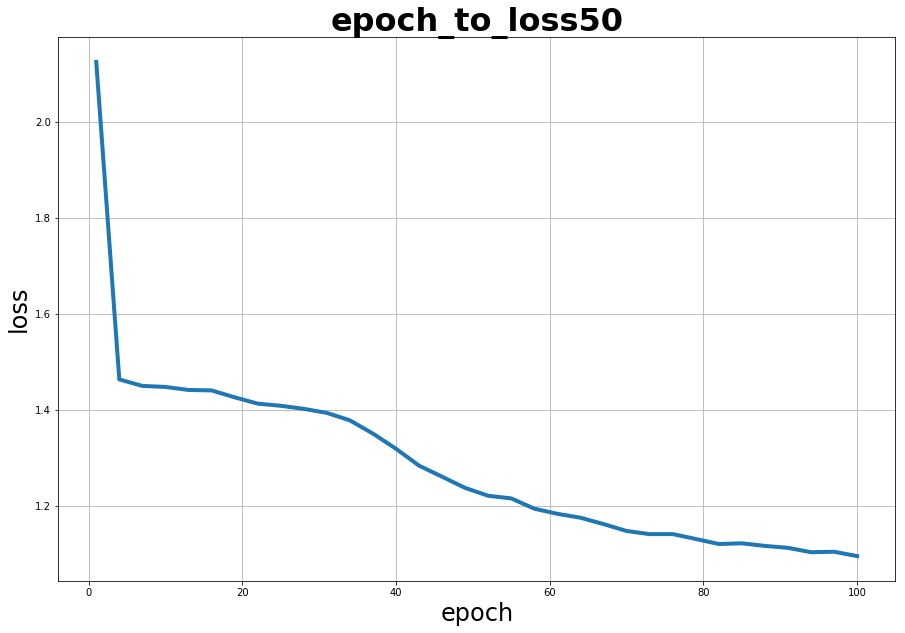

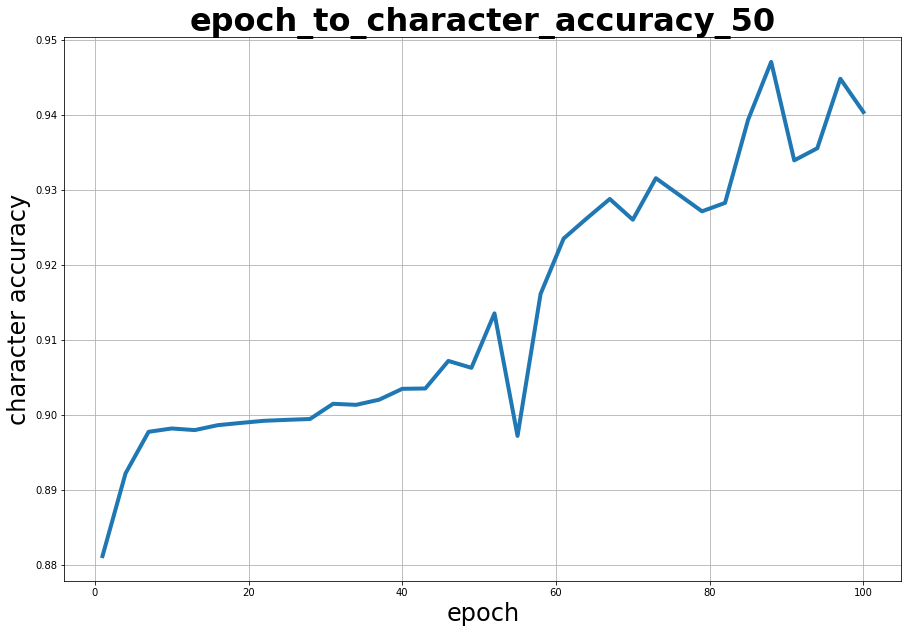

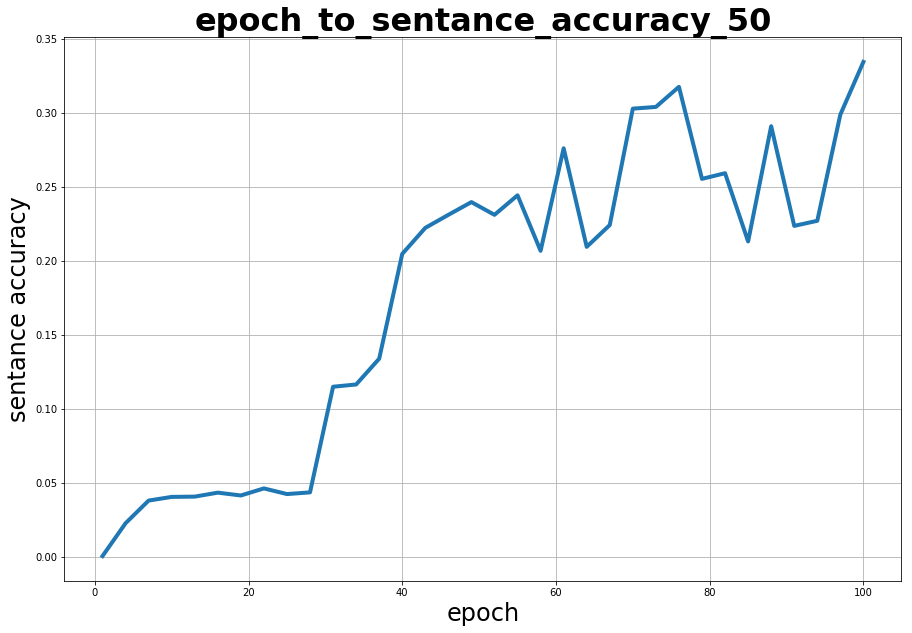

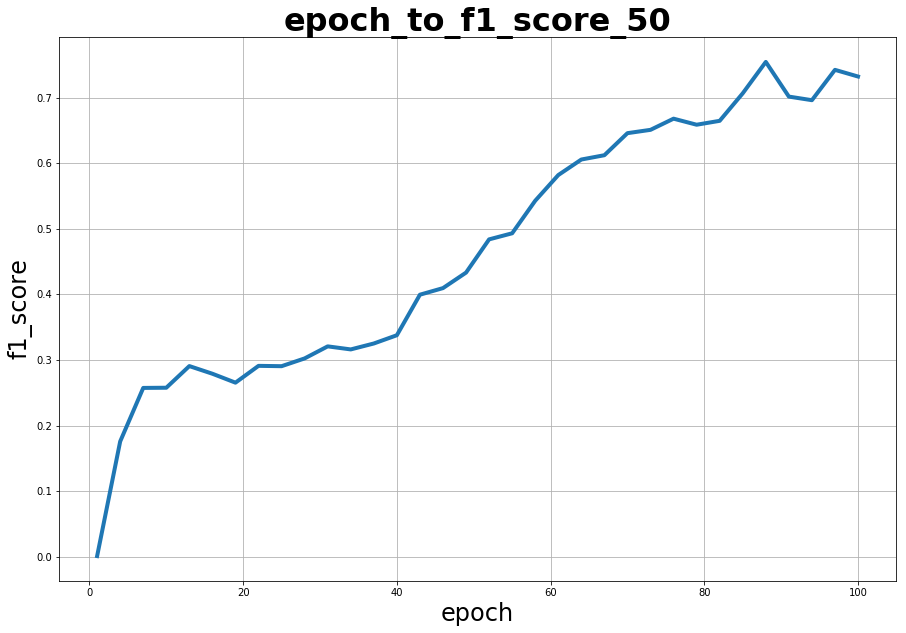

In [5]:
print("data : %s" % "unMatching")
train_path = "data/unmatching/N100" + "/data_train.txt"
dev_path = "data/unmatching/N100" + "/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer_unmatching(loss=loss, batch_size=32,
                                    checkpoint_every=50,
                                    print_every=100,
                                    hidden_size=hidden_size,
                                    path="data_to_accuracy/" + "unMatching")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                                             num_epochs=100, dev_data=dev,
                                                                                             optimizer=optimizer,
                                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)
torch.save(seq2seq.state_dict(), 'log/pth/data_to_accuracy' + '_unMatching' + '_model_save.pth')

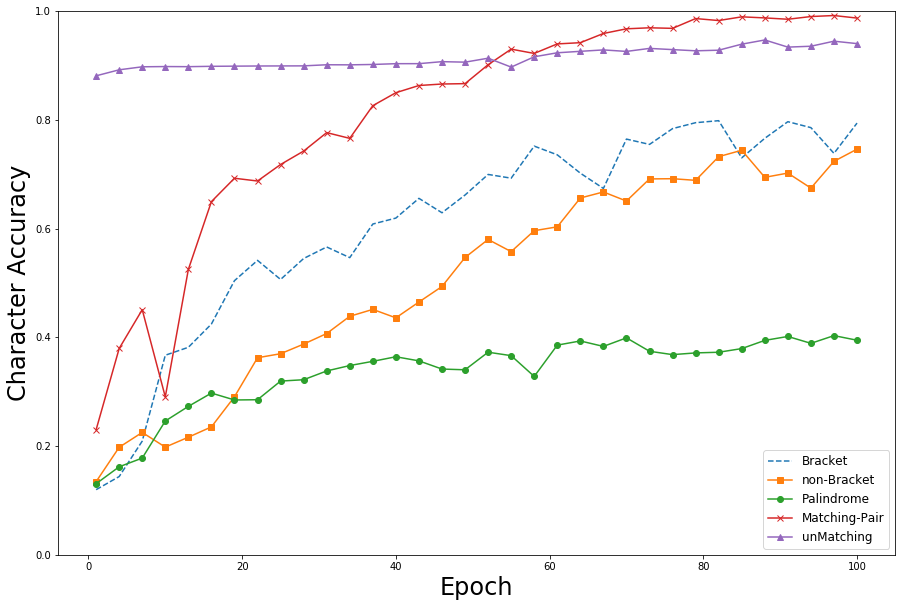

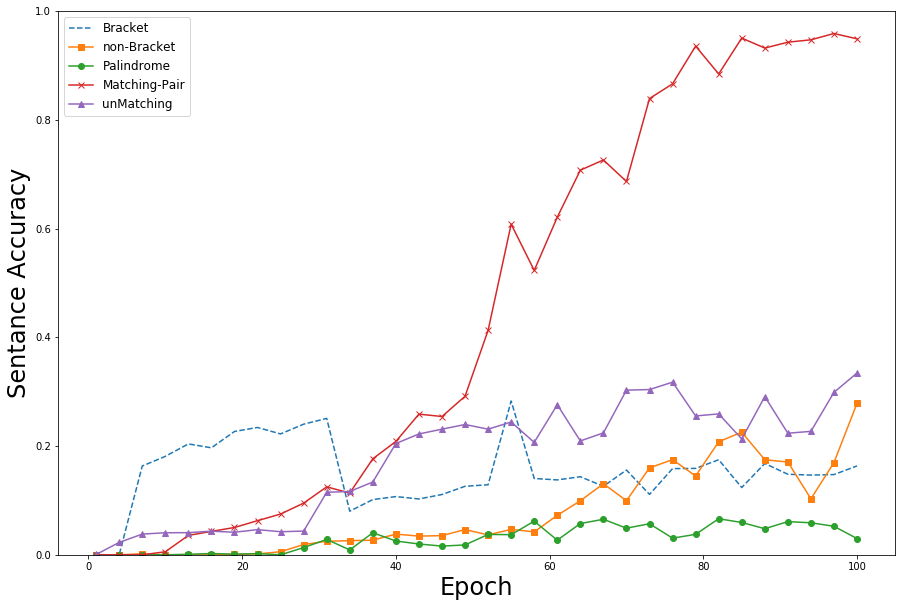

In [6]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', label="Bracket")
plt.plot(epochs[::3], character_accuracy[1][::3], '-s', label="non-Bracket")
plt.plot(epochs[::3], character_accuracy[2][::3], '-o', label="Palindrome")
plt.plot(epochs[::3], character_accuracy[3][::3], '-x', label="Matching-Pair")
plt.plot(epochs[::3], character_accuracy[4][::3], '-^', label="unMatching")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.savefig('log/plot/data_to_accuracy/data_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', label="Bracket")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-s', label="non-Bracket")
plt.plot(epochs[::3], sentance_accuracy[2][::3], '-o', label="Palindrome")
plt.plot(epochs[::3], sentance_accuracy[3][::3], '-x', label="Matching-Pair")
plt.plot(epochs[::3], sentance_accuracy[4][::3], '-^', label="unMatching")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.savefig('log/plot/data_to_accuracy/data_to_sentance_accuracy.png')

In [7]:
print(character_accuracy[0])
print(character_accuracy[1])
print(character_accuracy[2])
print(character_accuracy[3])
print(character_accuracy[4])

[0.11980779040743293, 0.12724929225904683, 0.14221796474340254, 0.14395081054349054, 0.16514604580164563, 0.1725914416887653, 0.2091681171948926, 0.23956106431778446, 0.23689364999630066, 0.3671218794172965, 0.3538587944844881, 0.4013816037974634, 0.3817089364220823, 0.39138950868954026, 0.41628018364271446, 0.4245082806665031, 0.45093709964447454, 0.46181703484772374, 0.5042970681806677, 0.5026265269486727, 0.48926219709271307, 0.5416369746459349, 0.546979591359914, 0.49424266850465143, 0.506508880347971, 0.5369797081809792, 0.5707565721584249, 0.5450520437845352, 0.5453752487315179, 0.6055147330833363, 0.5662706432557252, 0.592796813121342, 0.5970101595386347, 0.5466602804484372, 0.5974034571247221, 0.5911457420668762, 0.6084625179612387, 0.634241033009739, 0.591211940670475, 0.6194281219456159, 0.6291242703550971, 0.6536644821127479, 0.655712744788807, 0.5464811548151696, 0.6565188101385109, 0.6292216212427425, 0.6311997912796969, 0.6708800130839593, 0.6618497447459726, 0.6325510216

In [8]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])
print(sentance_accuracy[2])
print(sentance_accuracy[3])
print(sentance_accuracy[4])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.010596026490066225, 0.16329233680227057, 0.16480605487228003, 0.16461684011352887, 0.18107852412488173, 0.18240302743614, 0.21002838221381268, 0.20397350993377483, 0.2141911069063387, 0.21684011352885524, 0.1967833491012299, 0.195837275307474, 0.21816461684011354, 0.22686849574266793, 0.22346263008514664, 0.23859981078524126, 0.23424787133396405, 0.20397350993377483, 0.23519394512771996, 0.22232734153263956, 0.23765373699148534, 0.2261116367076632, 0.2403027436140019, 0.24427625354777674, 0.23954588457899717, 0.25089877010406814, 0.08306527909176915, 0.24862819299905392, 0.08022705771050143, 0.10331125827814569, 0.1053926206244087, 0.10160832544938506, 0.11012298959318827, 0.1076631977294229, 0.10709555345316935, 0.10406811731315042, 0.10179754020813624, 0.10274361400189215, 0.09479659413434248, 0.10614947965941343, 0.110879848628193, 0.11390728476821192, 0.11996215704824977, 0.1260170293282876, 0.08930936613055819, 0.12355723746452223, 0.12885525070955534, 